# Table of Contents
## 01. Importing Libraries & Data
## 02. Review Security Implications
## 03. Comparing Customer Behaviour via regional segmentation
## 04. Creating an exclusion flag for low-activity customers
## 05. Creating customer profiles
## 06. Creating appropriate visualizations for profiles
## 07. Aggregate max, mean, min variables on customer profiles for usage frequency and expenditure
## 08. Compare customer profiles with regions and departments
## 09. Producing Additional Charts for report
## 10. Exporting final dataset

## 01. Importing Libraries & Data

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# creating a path 
path = r'/Users/lianabulte/Career Foundry/2023 02 Instacart Basket Analysis'

In [3]:
# importing dataset 
df_ords_prods_all = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_all2.pkl'))

## 02. Review Security Implications

In [4]:
#checking headers
df_ords_prods_all.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,order_frequency_flag,first_name,last_name,gender,state,age,date_joined,n_dependants,fam_status,income
0,2398795.0,1,2.0,3.0,7.0,15.0,196.0,1.0,1.0,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
1,473747.0,1,3.0,3.0,12.0,21.0,196.0,1.0,1.0,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
2,2254736.0,1,4.0,4.0,7.0,29.0,196.0,1.0,1.0,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
3,431534.0,1,5.0,4.0,15.0,28.0,196.0,1.0,1.0,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
4,3367565.0,1,6.0,2.0,7.0,19.0,196.0,1.0,1.0,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423


In [5]:
# checking shape
df_ords_prods_all.shape

(30328764, 33)

* First and last name variables would be considered PII and need to be removed

In [6]:
# dropping the 2 columns
df_ords_prods_all = df_ords_prods_all.drop(columns=['first_name', 'last_name'])

In [7]:
# verifying the new df
df_ords_prods_all.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,spending_flag,median_prior_order,order_frequency_flag,gender,state,age,date_joined,n_dependants,fam_status,income
0,2398795.0,1,2.0,3.0,7.0,15.0,196.0,1.0,1.0,Soda,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
1,473747.0,1,3.0,3.0,12.0,21.0,196.0,1.0,1.0,Soda,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
2,2254736.0,1,4.0,4.0,7.0,29.0,196.0,1.0,1.0,Soda,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
3,431534.0,1,5.0,4.0,15.0,28.0,196.0,1.0,1.0,Soda,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
4,3367565.0,1,6.0,2.0,7.0,19.0,196.0,1.0,1.0,Soda,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423


## 03. Comparing Customer Behaviour via regional segmentation

In [9]:
# Reviewing state names in df
df_ords_prods_all['state'].value_counts()

Pennsylvania            626003
California              619377
Rhode Island            616005
Georgia                 615535
New Mexico              613252
Arizona                 613146
North Carolina          611018
Oklahoma                610954
Alaska                  607402
Minnesota               606952
Massachusetts           606002
Wyoming                 603254
Virginia                600998
Missouri                600027
Texas                   599536
Colorado                599168
Maine                   597710
North Dakota            597399
Alabama                 596749
Delaware                596476
Louisiana               596377
Kansas                  596360
South Carolina          596268
Nevada                  595274
Arkansas                595097
Oregon                  595079
New York                594878
Montana                 594458
Washington              593357
South Dakota            592697
Hawaii                  592166
Illinois                592080
Kentucky

### 3.a Creating Regions

In [10]:
Northeast = ['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'New Jersey']

In [11]:
Midwest = ['Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri']

In [13]:
South = ['Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Mississippi', 'Alabama', 'Oklahoma', 'Texas', 'Arkansas', 'Louisiana']

In [14]:
West = ['Idaho', 'Montana', 'Wyoming', 'Nevada', 'Utah', 'Colorado', 'Arizona', 'New Mexico', 'Alaska', 'Washington','Oregon', 'California', 'Hawaii']

In [15]:
# Using the 4 lists to create a new column
df_ords_prods_all.loc[df_ords_prods_all['state'].isin(Northeast), 'region'] = 'Northeast'

In [16]:
df_ords_prods_all.loc[df_ords_prods_all['state'].isin(Midwest), 'region'] = 'Midwest'

In [17]:
df_ords_prods_all.loc[df_ords_prods_all['state'].isin(South), 'region'] = 'South'

In [18]:
df_ords_prods_all.loc[df_ords_prods_all['state'].isin(West), 'region'] = 'West'

In [19]:
# Verifying new 'region' column
df_ords_prods_all['region'].value_counts()

South        9522349
West         7765088
Midwest      7107586
Northeast    4730269
Name: region, dtype: int64

In [21]:
# verifying the shape
df_ords_prods_all.shape

(30328764, 32)

### 3.b Reviewing relationship between spending habits & regions

In [22]:
# creating crosstab with spending flag and region
crosstab_spending = pd.crosstab(df_ords_prods_all['region'], df_ords_prods_all['spending_flag'], dropna = False)

In [23]:
crosstab_spending

spending_flag,High spender,Low spender
region,,
Midwest,148321,6959265
Northeast,93073,4637196
South,186808,9335540
West,149922,7615166


## 04. Creating an exclusion flag for low-activity customers
* Customers with less than 5 orders

In [25]:
# Creating a flag for activity levels
df_ords_prods_all.loc[df_ords_prods_all['max_order'] < 5, 'activity_flag'] = 'low-activity'
df_ords_prods_all.loc[df_ords_prods_all['max_order'] >= 5, 'activity_flag'] = 'high-activity'

In [26]:
# Verifying new column has worked
df_ords_prods_all['activity_flag'].value_counts()

high-activity    29303281
low-activity      1025482
Name: activity_flag, dtype: int64

In [27]:
# Checking updated df
df_ords_prods_all.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,order_frequency_flag,gender,state,age,date_joined,n_dependants,fam_status,income,region,activity_flag
0,2398795.0,1,2.0,3.0,7.0,15.0,196.0,1.0,1.0,Soda,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,high-activity
1,473747.0,1,3.0,3.0,12.0,21.0,196.0,1.0,1.0,Soda,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,high-activity
2,2254736.0,1,4.0,4.0,7.0,29.0,196.0,1.0,1.0,Soda,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,high-activity
3,431534.0,1,5.0,4.0,15.0,28.0,196.0,1.0,1.0,Soda,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,high-activity
4,3367565.0,1,6.0,2.0,7.0,19.0,196.0,1.0,1.0,Soda,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,high-activity


In [28]:
# Excluding low_activiy from df
df_highact = df_ords_prods_all.loc[df_ords_prods_all['activity_flag'] == 'high-activity']

In [29]:
# Verifying that low activity has been removed
df_highact['activity_flag'].value_counts()

high-activity    29303281
Name: activity_flag, dtype: int64

In [31]:
df_highact.shape

(29303281, 33)

Data matches previous value count check - good to proceed with export

In [32]:
# Exporting df_highact to pkl
df_highact.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'high_activity_customers.pkl'))

## 05. Creating customer profiles

In [33]:
# Importing newly exported pkl
df_ha_cust = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'high_activity_customers.pkl'))

In [34]:
# Importing department csv
departments = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'departments_wrangled.csv'))

#### Reviewing variables: Age, Income, Number of Dependants, and Departments

In [35]:
# View distribution of age
df_ha_cust['age'].describe()

count    2.930328e+07
mean     4.946594e+01
std      1.848512e+01
min      1.800000e+01
25%      3.300000e+01
50%      4.900000e+01
75%      6.500000e+01
max      8.100000e+01
Name: age, dtype: float64

age groupings will be divided into 3: young adult (18 - 33), adult (34 - 64), senior (65 - 81)

In [36]:
# Creating age groups
df_ha_cust.loc[(df_ha_cust['age'] >= 18) & (df_ha_cust['age'] < 34), 'age_group'] = 'Young adult'
df_ha_cust.loc[(df_ha_cust['age'] >= 34) & (df_ha_cust['age'] < 65), 'age_group'] = 'Adult'
df_ha_cust.loc[df_ha_cust['age'] >= 65, 'age_group'] = 'Senior'

In [37]:
# Checking that labels worked
df_ha_cust['age_group'].value_counts()

Adult          14208006
Senior          7754560
Young adult     7340715
Name: age_group, dtype: int64

In [38]:
df_ha_cust.shape

(29303281, 34)

In [39]:
# View distribution of income
df_ha_cust['income'].describe()

count    2.930328e+07
mean     9.972059e+04
std      4.317487e+04
min      2.590300e+04
25%      6.735100e+04
50%      9.678000e+04
75%      1.281150e+05
max      5.939010e+05
Name: income, dtype: float64

income will be divided into 4 groups: Low income(< 67,360), Middle income(67,361-96,780), Upper middle (96,781 - 128,115), High income (>128,116)

In [42]:
# Creating income levels
df_ha_cust.loc[df_ha_cust['income'] < 67360, 'income_level'] = 'Low Income'
df_ha_cust.loc[(df_ha_cust['income'] >= 67361) & (df_ha_cust['income'] < 96780), 'income_level'] = 'Middle Income'
df_ha_cust.loc[(df_ha_cust['income'] >= 96780) & (df_ha_cust['income'] < 128115), 'income_level'] = 'Uppder Middle Income'
df_ha_cust.loc[df_ha_cust['income'] >= 128115, 'income_level'] = 'High Income'

In [43]:
# Checking that labels worked
df_ha_cust['income_level'].value_counts()

Low Income              7326733
Uppder Middle Income    7326589
High Income             7325998
Middle Income           7323961
Name: income_level, dtype: int64

In [44]:
df_ha_cust.shape

(29303281, 35)

In [45]:
# viewing connection between 'fam_status' and 'n_dependants'
crosstab_fam = pd.crosstab(df_ha_cust['fam_status'],df_ha_cust['n_dependants'],dropna = False)

In [46]:
crosstab_fam

n_dependants,0,1,2,3
fam_status,,,,
divorced/widowed,2504114,0,0,0
living with parents and siblings,0,481447,458654,462551
married,0,6822179,6858671,6894892
single,4820773,0,0,0


In [48]:
#reviewing columns of df
pd.set_option('display.max_columns', None)
df_ha_cust.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,_merge,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_price,spending_flag,median_prior_order,order_frequency_flag,gender,state,age,date_joined,n_dependants,fam_status,income,region,activity_flag,age_group,income_level
0,2398795.0,1,2.0,3.0,7.0,15.0,196.0,1.0,1.0,Soda,77.0,7.0,9.0,both,Mid-range product,Regularly busy,Slowest days,Average orders,10.0,New customer,6.372222,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,high-activity,Young adult,Low Income
1,473747.0,1,3.0,3.0,12.0,21.0,196.0,1.0,1.0,Soda,77.0,7.0,9.0,both,Mid-range product,Regularly busy,Slowest days,Most orders,10.0,New customer,6.372222,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,high-activity,Young adult,Low Income
2,2254736.0,1,4.0,4.0,7.0,29.0,196.0,1.0,1.0,Soda,77.0,7.0,9.0,both,Mid-range product,Least busy,Slowest days,Average orders,10.0,New customer,6.372222,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,high-activity,Young adult,Low Income
3,431534.0,1,5.0,4.0,15.0,28.0,196.0,1.0,1.0,Soda,77.0,7.0,9.0,both,Mid-range product,Least busy,Slowest days,Most orders,10.0,New customer,6.372222,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,high-activity,Young adult,Low Income
4,3367565.0,1,6.0,2.0,7.0,19.0,196.0,1.0,1.0,Soda,77.0,7.0,9.0,both,Mid-range product,Regularly busy,Regular days,Average orders,10.0,New customer,6.372222,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,high-activity,Young adult,Low Income


In [47]:
# adding in the department names into the department_id column in df
departments

,Unnamed: 0,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [49]:
# Renaming index column
departments.rename(columns= {"Unnamed: 0": "department_id"}, inplace=True)

In [52]:
departments

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [57]:
# Joining 'department_id' and 'department' with zip() function to create a dictionary
dict_depts=dict(zip(departments["department_id"], departments["department"]))

In [58]:
dict_depts

{1: 'frozen',
 2: 'other',
 3: 'bakery',
 4: 'produce',
 5: 'alcohol',
 6: 'international',
 7: 'beverages',
 8: 'pets',
 9: 'dry goods pasta',
 10: 'bulk',
 11: 'personal care',
 12: 'meat seafood',
 13: 'pantry',
 14: 'breakfast',
 15: 'canned goods',
 16: 'dairy eggs',
 17: 'household',
 18: 'babies',
 19: 'snacks',
 20: 'deli',
 21: 'missing'}

In [59]:
# Mapping customers to department df by the map() function and department dictionary(dprt_map)
df_ha_cust['department'] = df_ha_cust['department_id'].map(dict_depts)

In [60]:
df_ha_cust.shape

(29303281, 36)

In [61]:
df_ha_cust.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,_merge,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_price,spending_flag,median_prior_order,order_frequency_flag,gender,state,age,date_joined,n_dependants,fam_status,income,region,activity_flag,age_group,income_level,department
0,2398795.0,1,2.0,3.0,7.0,15.0,196.0,1.0,1.0,Soda,77.0,7.0,9.0,both,Mid-range product,Regularly busy,Slowest days,Average orders,10.0,New customer,6.372222,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,high-activity,Young adult,Low Income,beverages
1,473747.0,1,3.0,3.0,12.0,21.0,196.0,1.0,1.0,Soda,77.0,7.0,9.0,both,Mid-range product,Regularly busy,Slowest days,Most orders,10.0,New customer,6.372222,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,high-activity,Young adult,Low Income,beverages
2,2254736.0,1,4.0,4.0,7.0,29.0,196.0,1.0,1.0,Soda,77.0,7.0,9.0,both,Mid-range product,Least busy,Slowest days,Average orders,10.0,New customer,6.372222,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,high-activity,Young adult,Low Income,beverages
3,431534.0,1,5.0,4.0,15.0,28.0,196.0,1.0,1.0,Soda,77.0,7.0,9.0,both,Mid-range product,Least busy,Slowest days,Most orders,10.0,New customer,6.372222,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,high-activity,Young adult,Low Income,beverages
4,3367565.0,1,6.0,2.0,7.0,19.0,196.0,1.0,1.0,Soda,77.0,7.0,9.0,both,Mid-range product,Regularly busy,Regular days,Average orders,10.0,New customer,6.372222,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,high-activity,Young adult,Low Income,beverages


### Creating customer profiles

In [63]:
# creating profile for "high income single adult"
df_ha_cust.loc[(df_ha_cust['n_dependants'] == 0) & (df_ha_cust['income'] >= 96780), 'profile'] = 'single adult high income'

In [64]:
# creating profile for "low income single adult"
df_ha_cust.loc[(df_ha_cust['n_dependants'] == 0) & (df_ha_cust['income'] < 96780), 'profile'] = 'single adult low income'

In [65]:
# creating profile for "high income small family"
df_ha_cust.loc[(df_ha_cust['n_dependants'] == 1) & (df_ha_cust['income'] >= 96780), 'profile'] = 'small family high income'

In [66]:
# creating profile for "low income small family"
df_ha_cust.loc[(df_ha_cust['n_dependants'] == 1) & (df_ha_cust['income'] < 96780), 'profile'] = 'small family low income'

In [67]:
# creating profile for "high income big family"
df_ha_cust.loc[(df_ha_cust['n_dependants'] >= 2) & (df_ha_cust['income'] >= 96780), 'profile'] = 'big family high income'

In [68]:
# creating profile for "low income big family"
df_ha_cust.loc[(df_ha_cust['n_dependants'] >= 2) & (df_ha_cust['income'] < 96780), 'profile'] = 'big family low income'

In [69]:
# creating profile for "high income retired"
df_ha_cust.loc[(df_ha_cust['age_group'] == 'Senior') & (df_ha_cust['income'] >= 96780), 'profile'] = 'retired high income'

In [70]:
# creating profile for "low income retired"
df_ha_cust.loc[(df_ha_cust['age_group'] == 'Senior') & (df_ha_cust['income'] < 96780), 'profile'] = 'retired low income'

In [71]:
df_ha_cust['profile'].value_counts(dropna = False)

big family low income       6304609
retired high income         5707447
big family high income      4447937
small family low income     3152408
single adult low income     3146564
single adult high income    2264753
small family high income    2232450
retired low income          2047113
Name: profile, dtype: int64

## 06. Creating appropriate visualizations for profiles

Text(0.5, 1.0, 'Customer profiles')

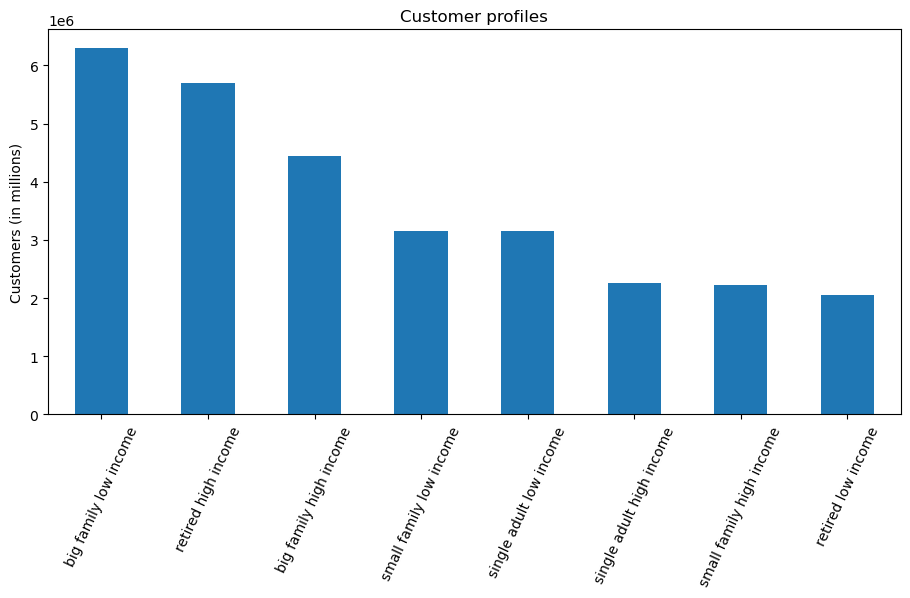

In [77]:
# creating a barchart with the profiles
bar = df_ha_cust['profile'].value_counts().plot.bar(rot=65, figsize = (11,5))
plt.ylabel ('Customers (in millions)')
plt.title ("Customer profiles")

In [164]:
#exporting bar chart of profiles
bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations','barchart_profiles.png'), bbox_inches='tight')

## 07. Aggregate max, mean, min variables on customer profiles for usage frequency and expenditure

In [79]:
#comparing the max, min, and mean values on usage frequency
df_ha_cust.groupby('profile').agg({'days_since_prior_order':['mean', 'min','max']})

days_since_prior_order           
                                           mean  min   max
profile                                                   
big family high income                10.825163  0.0  30.0
big family low income                 10.844855  0.0  30.0
retired high income                   10.767454  0.0  30.0
retired low income                    10.859631  0.0  30.0
single adult high income              10.702440  0.0  30.0
single adult low income               10.870629  0.0  30.0
small family high income              10.786021  0.0  30.0
small family low income               10.800227  0.0  30.0

In [80]:
#comparing the max, min, and mean values on expenditure
df_ha_cust.groupby('profile').agg({'prices':['mean', 'min','max']})

prices           
                              mean  min   max
profile                                      
big family high income    7.956912  1.0  25.0
big family low income     7.669465  1.0  25.0
retired high income       7.957061  1.0  25.0
retired low income        7.352685  1.0  25.0
single adult high income  7.949645  1.0  25.0
single adult low income   7.668598  1.0  25.0
small family high income  7.952778  1.0  25.0
small family low income   7.679489  1.0  25.0

## 08. Compare customer profiles with regions and departments 

In [81]:
# creating a crosstab to compare with regions
crosstab_region = pd.crosstab(df_ha_cust['profile'], df_ha_cust['region'], dropna = False)

In [82]:
crosstab_region

region,Midwest,Northeast,South,West
profile,,,,
big family high income,1063644,704983,1370505,1129253
big family low income,1436421,958142,2023379,1626490
retired high income,1334990,914234,1762474,1458430
retired low income,464696,328864,643131,527773
single adult high income,558995,320715,712327,589670
single adult low income,721533,493015,1012761,798246
small family high income,537003,363660,670232,582214
small family low income,751137,481997,1004894,793052


In [83]:
# creating a crosstab to compare with departments
crosstab_depts = pd.crosstab(df_ha_cust['profile'], df_ha_cust['department'], dropna = False)

In [84]:
crosstab_depts

department,alcohol,babies,bakery,beverages,breakfast,bulk,canned goods,dairy eggs,deli,dry goods pasta,frozen,household,international,meat seafood,missing,other,pantry,personal care,pets,produce,snacks
profile,,,,,,,,,,,,,,,,,,,,,
big family high income,21514,66628,165700,352956,92763,4237,151060,755610,144970,123091,307811,100299,37125,105345,9387,4923,261826,61404,14276,1322615,344397
big family low income,28503,80139,223296,539121,140206,7579,198625,1041242,203160,161500,427488,142547,50271,129255,14004,6940,353676,86304,17189,1831997,621567
retired high income,25234,77801,210096,451987,117378,5951,193378,969834,186072,157246,394917,126414,48086,135416,12237,6270,335252,76348,18403,1713099,446028
retired low income,8949,23490,69721,196322,47895,2613,58756,326899,64262,47334,136263,49325,15099,35725,4312,2194,110146,28159,5452,570092,244105
single adult high income,12225,32396,86072,180540,48137,2201,76670,385213,74184,61935,155126,49405,19329,51725,4717,2582,133052,29867,7385,677360,174632
single adult low income,13694,41511,111686,271594,68964,3427,99246,520972,103406,80280,209883,69546,25766,62914,6979,3631,176364,43741,8439,915929,308592
small family high income,10812,28321,82024,176793,47231,2466,76622,381120,70278,61234,154172,50414,19023,52804,5128,2545,132463,30765,6369,668603,173263
small family low income,13936,41421,112017,268273,70895,3524,100092,528463,101221,81373,210784,71025,26170,64092,6625,3487,178612,43151,10292,909006,307949


([<matplotlib.axis.XTick at 0x50e683130>,
 [Text(0, 0, 'big family\nhigh income '),
  Text(1, 0, 'big family\nlow income'),
  Text(2, 0, 'retired\nhigh income'),
  Text(3, 0, 'retired\nlow income'),
  Text(4, 0, 'single adult\nhigh income'),
  Text(5, 0, 'single adult\nlow income'),
  Text(6, 0, 'small family\nhigh income'),
  Text(7, 0, 'small family\nlow income')])

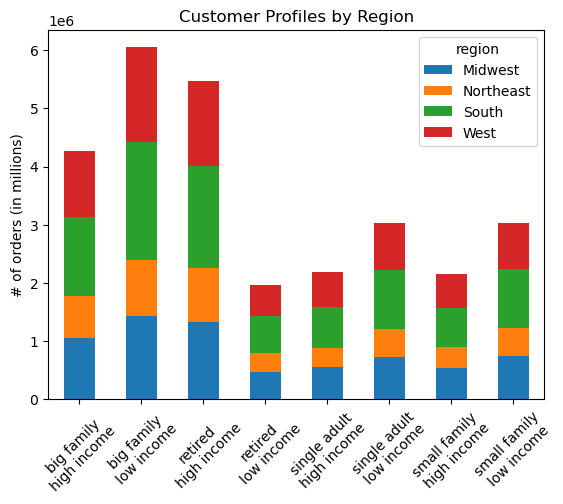

In [102]:
# creating a stacked barchart of customer profile by region
stacked_region_profile = crosstab_region.plot(kind='bar', stacked=True)

# adding a title and rotate the x-axis labels to be horizontal
plt.xlabel("")
plt.ylabel("# of orders (in millions)")
plt.title('Customer Profiles by Region')
plt.xticks([0,1,2,3,4,5,6,7],['big family\nhigh income ','big family\nlow income','retired\nhigh income','retired\nlow income','single adult\nhigh income','single adult\nlow income','small family\nhigh income','small family\nlow income'],rotation = 45)

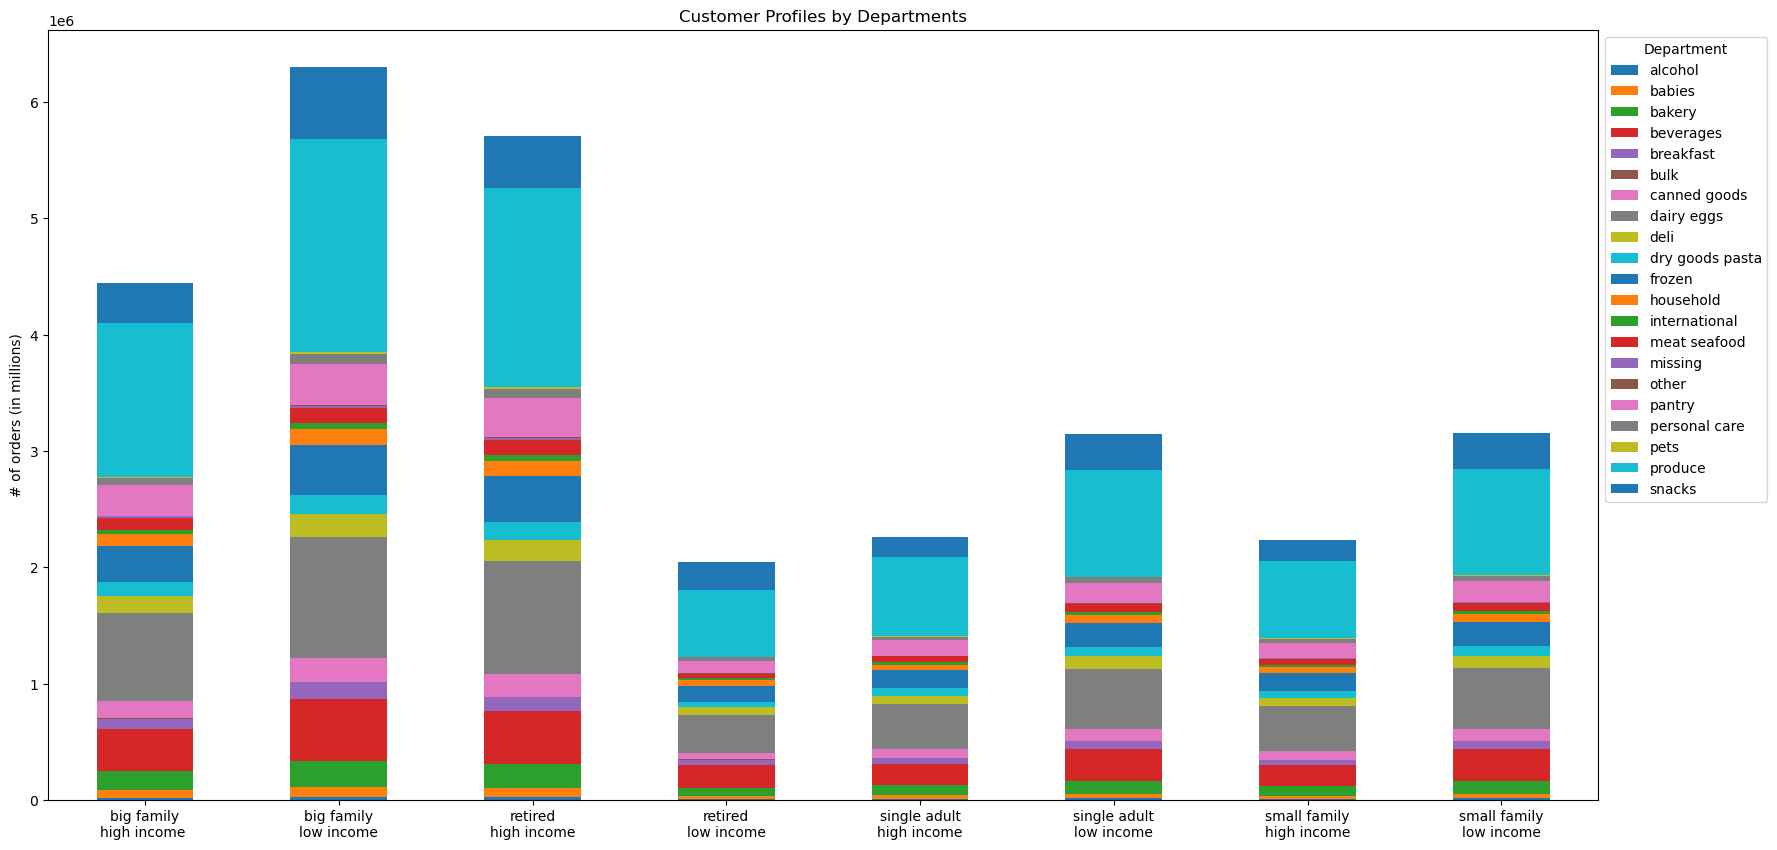

In [104]:
# creating a stacked barchart of customer profile by departments
stacked_depts_profile = crosstab_depts.plot(kind='bar', stacked=True, figsize=(20,10))

# adding a title and rotate the x-axis labels to be horizontal
plt.xlabel("")
plt.ylabel("# of orders (in millions)")
plt.title('Customer Profiles by Departments')
plt.xticks([0,1,2,3,4,5,6,7],['big family\nhigh income ','big family\nlow income','retired\nhigh income','retired\nlow income','single adult\nhigh income','single adult\nlow income','small family\nhigh income','small family\nlow income'],rotation = 0)
plt.legend(title="Department", bbox_to_anchor=(1.0,1.0))

In [103]:
#exporting the region bar chart
stacked_region_profile.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations','barchart_profiles_region.png'), bbox_inches='tight')

In [105]:
#exporting the departments bar chart
stacked_depts_profile.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations','barchart_profiles_depts.png'), bbox_inches='tight')

## 09. Producing Additional Charts for report

(array([0, 1, 2]),
 [Text(0, 0, 'Mid-range product'),
  Text(1, 0, 'Low-range product'),
  Text(2, 0, 'High-range product')])

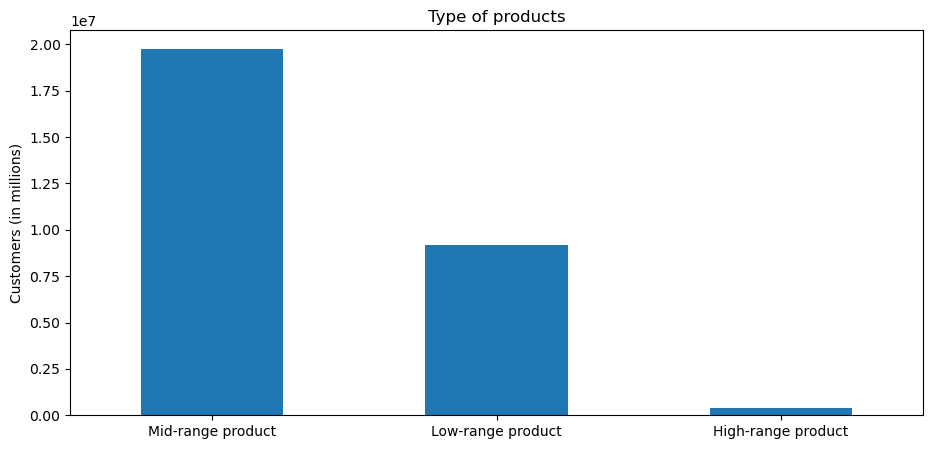

In [112]:
#creating a graph for price ranges
bar_price_range = df_ha_cust['price_range_loc'].value_counts().plot.bar(figsize = (11,5))
plt.ylabel ('Customers (in millions)')
plt.title ("Type of products")
plt.xticks (rotation = 0)

In [113]:
#exporting the price range bar chart
bar_price_range.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations','barchart_product_ranges.png'), bbox_inches='tight')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]),
 [Text(0, 0, 'produce'),
  Text(1, 0, 'dairy eggs'),
  Text(2, 0, 'snacks'),
  Text(3, 0, 'beverages'),
  Text(4, 0, 'frozen'),
  Text(5, 0, 'pantry'),
  Text(6, 0, 'bakery'),
  Text(7, 0, 'canned goods'),
  Text(8, 0, 'deli'),
  Text(9, 0, 'dry goods pasta'),
  Text(10, 0, 'household'),
  Text(11, 0, 'meat seafood'),
  Text(12, 0, 'breakfast'),
  Text(13, 0, 'personal care'),
  Text(14, 0, 'babies'),
  Text(15, 0, 'international'),
  Text(16, 0, 'alcohol'),
  Text(17, 0, 'pets'),
  Text(18, 0, 'missing'),
  Text(19, 0, 'other'),
  Text(20, 0, 'bulk')])

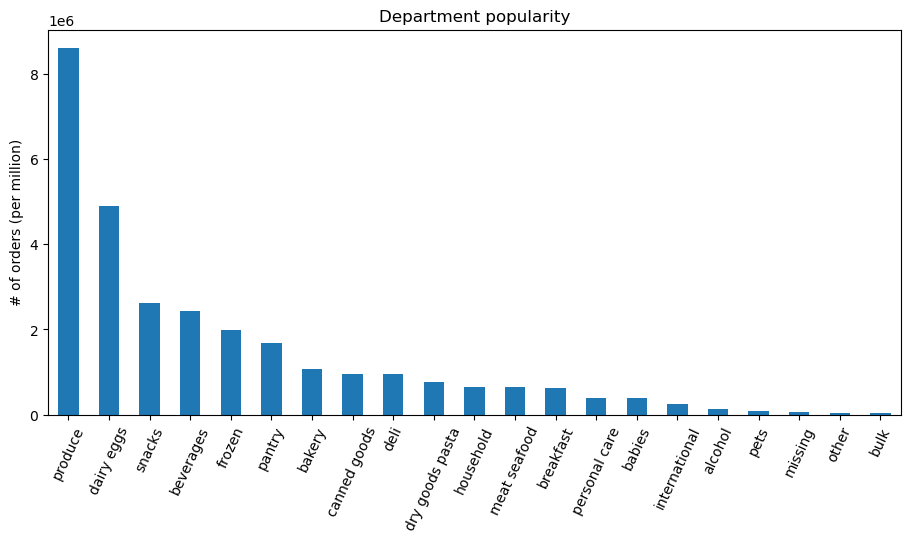

In [119]:
# creating a graph for frequency of product orders per department 
bar_dept_orders = df_ha_cust['department'].value_counts().plot.bar(figsize = (11,5))
plt.ylabel ('# of orders (per million)')
plt.title ("Department popularity")
plt.xticks (rotation = 65)

In [120]:
#exporting the departments bar chart
bar_dept_orders.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations','barchart_dept_popular.png'), bbox_inches='tight')

(array([0, 1, 2]),
 [Text(0, 0, 'Regular customer'),
  Text(1, 0, 'Loyal customer'),
  Text(2, 0, 'New customer')])

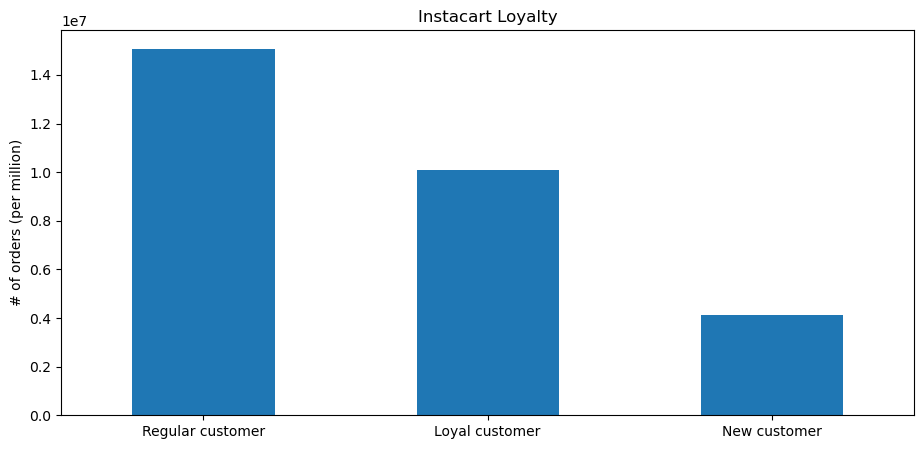

In [122]:
# creating a graph for frequency of product orders per department 
bar_loyalty_flag = df_ha_cust['loyalty_flag'].value_counts().plot.bar(figsize = (11,5))
plt.ylabel ('# of orders (per million)')
plt.title ("Instacart Loyalty")
plt.xticks (rotation = 0)

In [124]:
# viewing connection between loyalty status and user profiles
crosstab_loyalty = pd.crosstab(df_ha_cust['loyalty_flag'],df_ha_cust['profile'],dropna = False)

In [125]:
crosstab_loyalty

profile,big family high income,big family low income,retired high income,retired low income,single adult high income,single adult low income,small family high income,small family low income
loyalty_flag,,,,,,,,
Loyal customer,1526568,2153492,1970855,702731,806803,1079182,767773,1087977
New customer,604636,897354,792105,304821,303996,455466,312253,455578
Regular customer,2316733,3253763,2944487,1039561,1153954,1611916,1152424,1608853


In [126]:
#exporting the loyalty bar chart
bar_loyalty_flag.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations','barchart_loyalty_flag.png'), bbox_inches='tight')

In [132]:
# creating cross tab between loyalty status and departments
crosstab_loyalty_dept = pd.crosstab(df_ha_cust['department'],df_ha_cust['loyalty_flag'],dropna = False)

In [133]:
crosstab_loyalty_dept

loyalty_flag,Loyal customer,New customer,Regular customer
department,,,
alcohol,38081,23854,72932
babies,164126,40490,187091
bakery,372925,147535,540152
beverages,840147,341838,1255601
breakfast,217325,90964,325180
bulk,13595,3598,14805
canned goods,289296,154458,510695
dairy eggs,1797296,644262,2467795
deli,317771,135362,494420


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]),
 [Text(0, 0, 'alcohol'),
  Text(1, 0, 'babies'),
  Text(2, 0, 'bakery'),
  Text(3, 0, 'beverages'),
  Text(4, 0, 'breakfast'),
  Text(5, 0, 'bulk'),
  Text(6, 0, 'canned goods'),
  Text(7, 0, 'dairy eggs'),
  Text(8, 0, 'deli'),
  Text(9, 0, 'dry goods pasta'),
  Text(10, 0, 'frozen'),
  Text(11, 0, 'household'),
  Text(12, 0, 'international'),
  Text(13, 0, 'meat seafood'),
  Text(14, 0, 'missing'),
  Text(15, 0, 'other'),
  Text(16, 0, 'pantry'),
  Text(17, 0, 'personal care'),
  Text(18, 0, 'pets'),
  Text(19, 0, 'produce'),
  Text(20, 0, 'snacks')])

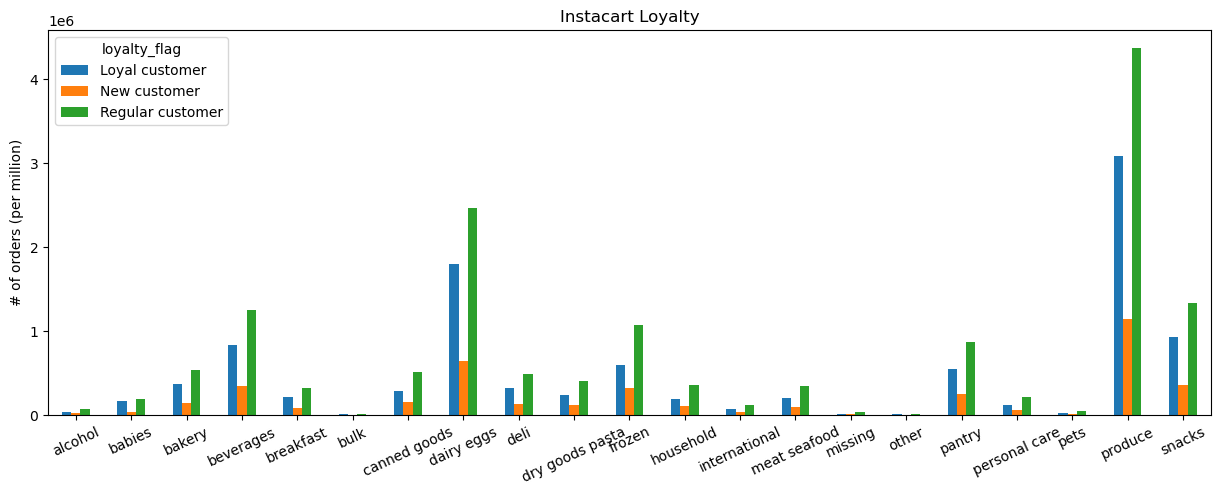

In [139]:
# creating a graph for loyalty between product departments 
bar_loyalty_dept = crosstab_loyalty_dept.plot(kind='bar', figsize=(15,5))
plt.ylabel ('# of orders (per million)')
plt.xlabel ("")
plt.title ("Instacart Loyalty")
plt.xticks (rotation = 25)

In [140]:
#exporting the loyalty bar chart per dept
bar_loyalty_dept.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations','barchart_dept_loyalty.png'), bbox_inches='tight')

In [141]:
# creating cross tab between loyalty status and time of day orders
crosstab_loyalty_dow = pd.crosstab(df_ha_cust['orders_day_of_week'],df_ha_cust['loyalty_flag'],dropna = False)

In [142]:
crosstab_loyalty_dow

loyalty_flag,Loyal customer,New customer,Regular customer
orders_day_of_week,,,
0.0,1717918,845568,3004813
1.0,1809749,704416,2611435
2.0,1330526,537479,1946059
3.0,1246650,480505,1751519
4.0,1270311,461181,1710199
5.0,1431148,506673,1892196
6.0,1289079,590387,2165470


(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, '0.0'),
  Text(1, 0, '1.0'),
  Text(2, 0, '2.0'),
  Text(3, 0, '3.0'),
  Text(4, 0, '4.0'),
  Text(5, 0, '5.0'),
  Text(6, 0, '6.0')])

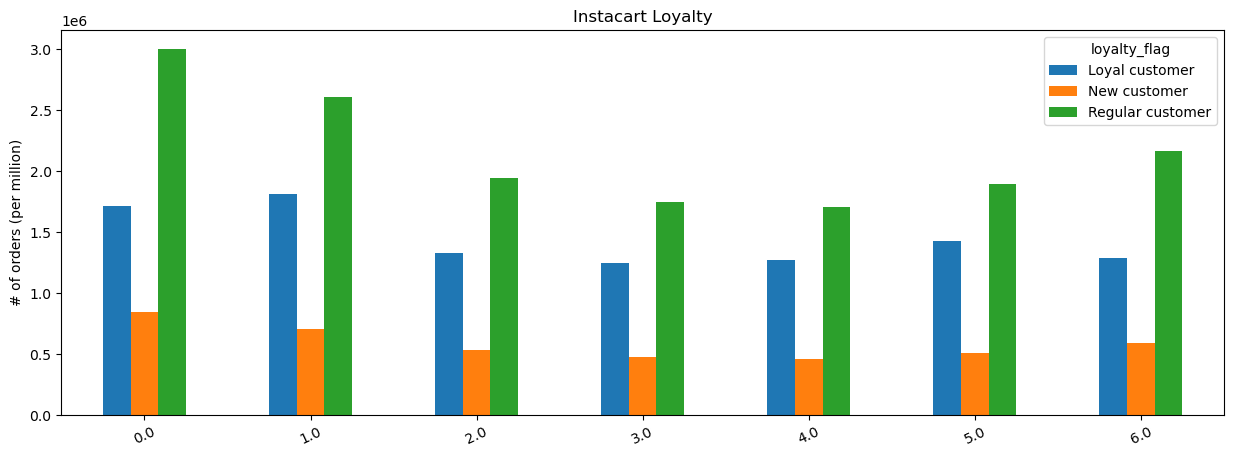

In [143]:
# creating a graph for loyalty between loyalty and dow 
bar_loyalty_dow = crosstab_loyalty_dow.plot(kind='bar', figsize=(15,5))
plt.ylabel ('# of orders (per million)')
plt.xlabel ("")
plt.title ("Instacart Loyalty")
plt.xticks (rotation = 25)

In [144]:
#exporting the loyalty bar chart per dept
bar_loyalty_dow.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations','barchart_dow_loyalty.png'), bbox_inches='tight')

In [145]:
# creating cross tab between loyalty status and US region
crosstab_loyalty_region = pd.crosstab(df_ha_cust['region'],df_ha_cust['loyalty_flag'],dropna = False)

In [146]:
crosstab_loyalty_region

loyalty_flag,Loyal customer,New customer,Regular customer
region,,,
Midwest,2329930,976004,3562485
Northeast,1589432,640121,2336057
South,3162378,1289666,4747659
West,2614531,1058170,3832427


(array([0, 1, 2, 3]),
 [Text(0, 0, 'Midwest'),
  Text(1, 0, 'Northeast'),
  Text(2, 0, 'South'),
  Text(3, 0, 'West')])

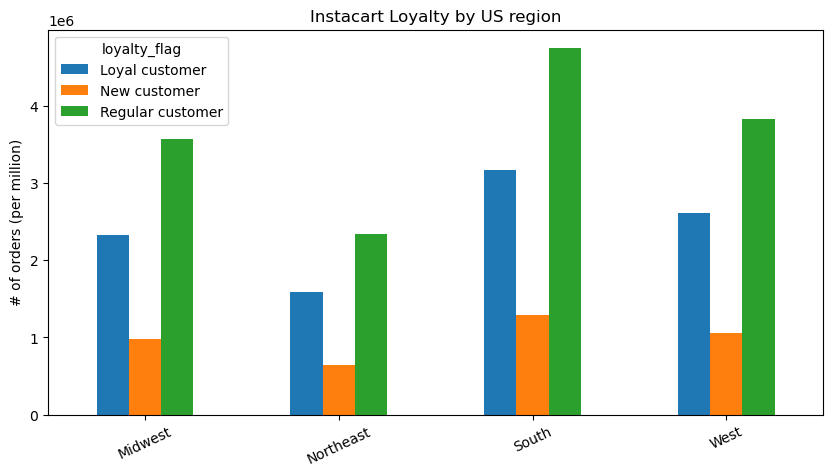

In [151]:
# creating a graph for loyalty between loyalty and dow 
bar_loyalty_region = crosstab_loyalty_region.plot(kind='bar', figsize=(10,5))
plt.ylabel ('# of orders (per million)')
plt.xlabel ("")
plt.title ("Instacart Loyalty by US region")
plt.xticks (rotation = 25)

In [152]:
#exporting the loyalty bar chart per region
bar_loyalty_region.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations','barchart_region_loyalty.png'), bbox_inches='tight')

In [153]:
# creating a crosstab for region and order frequency 
crosstab_order_region = pd.crosstab(df_ha_cust['region'],df_ha_cust['order_frequency_flag'],dropna = False)

In [154]:
crosstab_order_region

order_frequency_flag,Frequent customer,Non-frequent customer,Regular customer
region,,,
Midwest,4751300,603286,1513833
Northeast,3181611,385721,998278
South,6429260,797478,1972965
West,5254777,647275,1603076


(array([0, 1, 2, 3]),
 [Text(0, 0, 'Midwest'),
  Text(1, 0, 'Northeast'),
  Text(2, 0, 'South'),
  Text(3, 0, 'West')])

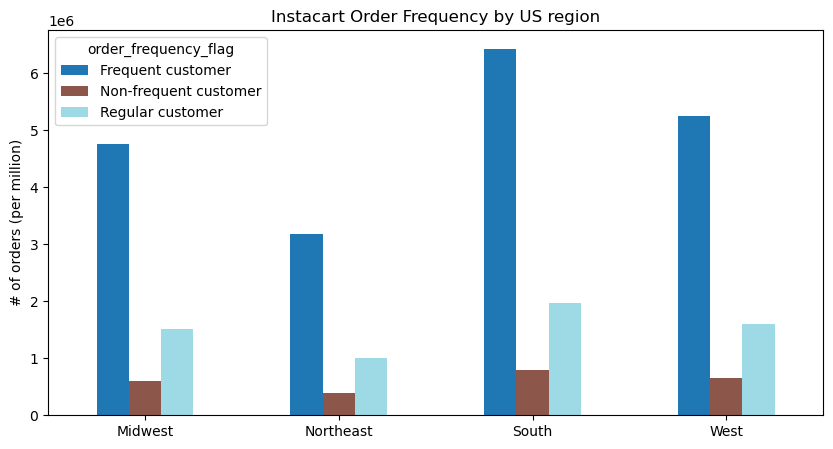

In [160]:
# creating a graph for region and order frequency  
bar_order_region = crosstab_order_region.plot(kind='bar', figsize=(10,5), cmap='tab20')
plt.ylabel ('# of orders (per million)')
plt.xlabel ("")
plt.title ("Instacart Order Frequency by US region")
plt.xticks (rotation = 0)

In [161]:
#exporting the frequency bar chart per region
bar_order_region.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations','barchart_region_frequency.png'), bbox_inches='tight')

In [167]:
# creating a crosstab for age and frequency status
crosstab_age_orders = pd.crosstab(df_ha_cust['age_group'],df_ha_cust['order_frequency_flag'],dropna = False)

In [169]:
crosstab_age_orders

order_frequency_flag,Frequent customer,Non-frequent customer,Regular customer
age_group,,,
Adult,9895589,1232463,3079954
Senior,5423281,663948,1667331
Young adult,5105397,634077,1601241


(array([0, 1, 2]),
 [Text(0, 0, 'Adult'), Text(1, 0, 'Senior'), Text(2, 0, 'Young adult')])

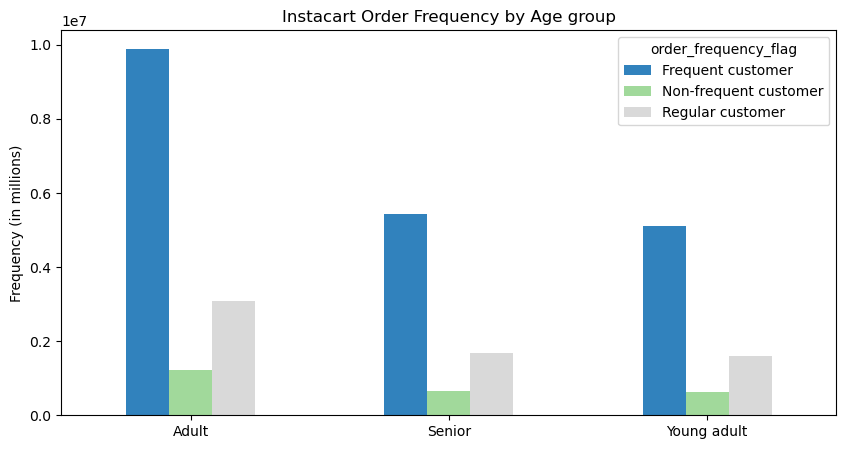

In [179]:
# creating a graph for age and order frequency  
bar_age_orders = crosstab_age_orders.plot(kind='bar', figsize=(10,5), cmap='tab20c')
plt.ylabel ('Frequency (in millions)')
plt.xlabel ("")
plt.title ("Instacart Order Frequency by Age group")
plt.xticks (rotation = 0)

In [172]:
 # creating a crosstab for frequency family status
crosstab_dependants_orders = pd.crosstab(df_ha_cust['n_dependants'],df_ha_cust['order_frequency_flag'],dropna = False)

In [173]:
crosstab_dependants_orders

order_frequency_flag,Frequent customer,Non-frequent customer,Regular customer
n_dependants,,,
0,5091880,625979,1607028
1,5103288,644428,1555910
2,5107136,626770,1583419
3,5121963,633311,1602169


(array([0, 1, 2, 3]),
 [Text(0, 0, '0'), Text(1, 0, '1'), Text(2, 0, '2'), Text(3, 0, '3')])

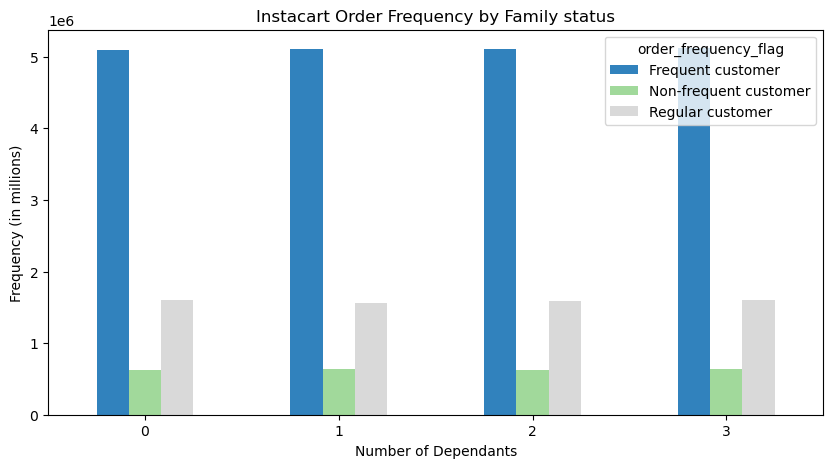

In [176]:
# creating a graph for family size and order frequency  
bar_dependants_orders = crosstab_dependants_orders.plot(kind='bar', figsize=(10,5), cmap='tab20c')
plt.ylabel ('Frequency (in millions)')
plt.xlabel ("Number of Dependants")
plt.title ("Instacart Order Frequency by Family status")
plt.xticks (rotation = 0)

In [180]:
#exporting the frequency bar chart per age range
bar_age_orders.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations','barchart_age_order_frequency.png'), bbox_inches='tight')

In [178]:
#exporting the frequency bar chart per region
bar_dependants_orders.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations','barchart_dependants_orders.png'), bbox_inches='tight')

In [181]:
# creating a crosstab for age and price range frequency
crosstab_age_pricerange = pd.crosstab(df_ha_cust['age_group'],df_ha_cust['price_range_loc'],dropna = False)

In [182]:
crosstab_age_pricerange

price_range_loc,High-range product,Low-range product,Mid-range product
age_group,,,
Adult,180926,4439348,9587732
Senior,100977,2421166,5232417
Young adult,93930,2294804,4951981


(array([0, 1, 2]),
 [Text(0, 0, 'Adult'), Text(1, 0, 'Senior'), Text(2, 0, 'Young adult')])

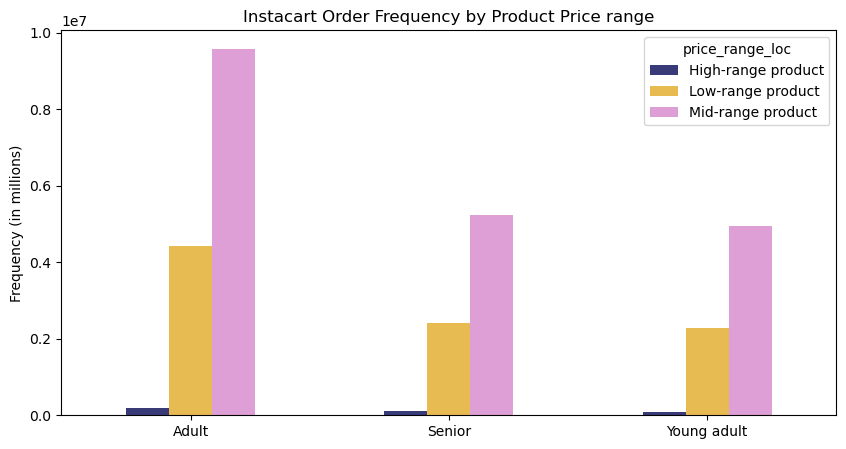

In [183]:
# creating a graph for age and price range frequency  
bar_age_pricerange = crosstab_age_pricerange.plot(kind='bar', figsize=(10,5), cmap='tab20b')
plt.ylabel ('Frequency (in millions)')
plt.xlabel ("")
plt.title ("Instacart Order Frequency by Product Price range")
plt.xticks (rotation = 0)

In [184]:
#exporting the frequency bar chart per price range
bar_age_pricerange.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations','barchart_age_pricerange.png'), bbox_inches='tight')

In [185]:
# creating a crosstab for price frequency family status
crosstab_dependants_pricerange = pd.crosstab(df_ha_cust['n_dependants'],df_ha_cust['price_range_loc'],dropna = False)

In [186]:
crosstab_dependants_pricerange

price_range_loc,High-range product,Low-range product,Mid-range product
n_dependants,,,
0,91938,2289060,4943889
1,94017,2278028,4931581
2,94750,2290296,4932279
3,95128,2297934,4964381


(array([0, 1, 2, 3]),
 [Text(0, 0, '0'), Text(1, 0, '1'), Text(2, 0, '2'), Text(3, 0, '3')])

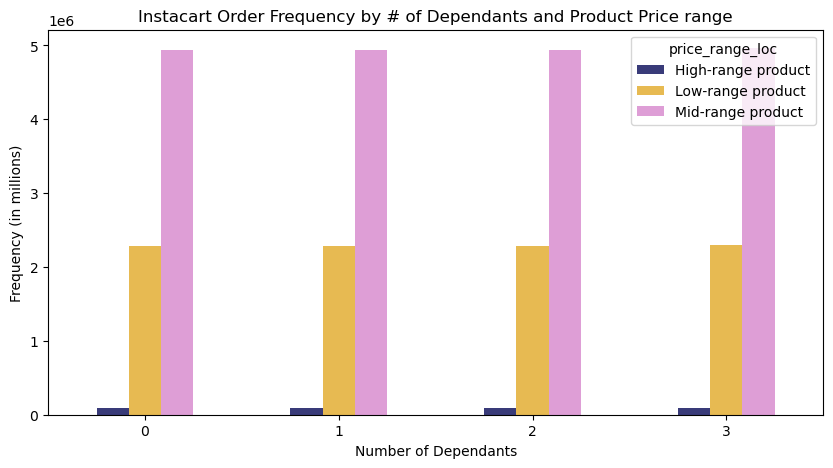

In [190]:
# creating a graph for number of dependants and price range frequency  
bar_dependants_pricerange = crosstab_dependants_pricerange.plot(kind='bar', figsize=(10,5), cmap='tab20b')
plt.ylabel ('Frequency (in millions)')
plt.xlabel ("Number of Dependants")
plt.title ("Instacart Order Frequency by # of Dependants and Product Price range")
plt.xticks (rotation = 0)

In [191]:
#exporting the price range per dependants chart
bar_dependants_pricerange.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations','barchart_dependants_pricerange.png'), bbox_inches='tight')

## 10. Exporting final dataset

In [192]:
#Export df_ha_cust in .pkl format
df_ha_cust.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'highact_customers_final.pkl'))